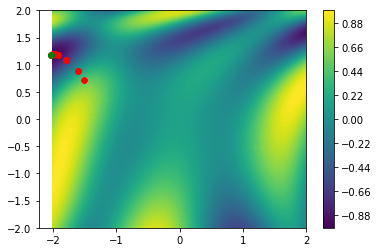

In [120]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1/ 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

res = 100

_X = np.linspace(-2, 2, res)
_Y = np.linspace(-2, 2, res)
_Z = np.zeros((res, res))

for ix, x in enumerate(_X):
  for iy, y in enumerate(_Y):
    _Z[iy, ix] = func([x, y])

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

Theta = np.random.rand(2) * 4 - 2
_T = np.copy(Theta)
h = 0.001
lr = 0.001

plt.plot(Theta[0], Theta[1], "o", c="white")
grad = np.zeros(2)


for _ in range(1000):

  for it, th in enumerate(Theta):
    
    _T = np.copy(Theta)
    _T[it] = _T[it] + h
    deriv = (func(_T) - func(Theta)) / h
    grad[it] = deriv

  Theta = Theta - lr * grad
  #print(Theta)
  #print(func(Theta))

  if(_%100 == 0):
    plt.plot(Theta[0], Theta[1], "o", c="red")

plt.plot(Theta[0], Theta[1], "o", c="green")
plt.show()

[-0.66766667 -1.33433333]


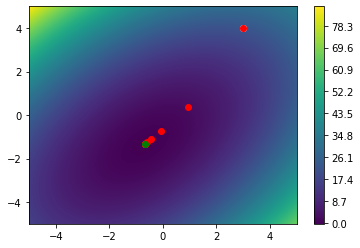

In [180]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

func = lambda v: (v[0] ** 2) + (v[1] ** 2) - (v[0] * v[1]) + (2 * v[1]) + 1

res = 100

_X = np.linspace(-5, 5, res)
_Y = np.linspace(-5, 5, res)
_Z = np.zeros((res, res))

for ix, x in enumerate(_X):
  for iy, y in enumerate(_Y):
    _Z[iy, ix] = func([x, y])

plt.contourf(_X, _Y, _Z, 1000)
plt.colorbar()

Theta = np.array((3,4))
_T = np.copy(Theta)
h = 0.001
lr = 0.01

plt.plot(Theta[0], Theta[1], "o", c="white")
grad = np.zeros(2)


for _ in range(100000):
  for it, th in enumerate(Theta):
    _T = np.copy(Theta)
    _T[it] = _T[it] + h
    deriv = (func(_T) - func(Theta)) / h
    grad[it] = deriv

  Theta = Theta - lr * grad

  if(_%100 == 0):
    plt.plot(Theta[0], Theta[1], "o", c="red")

plt.plot(Theta[0], Theta[1], "o", c="green")
print(Theta)
plt.show()

Prográmese el método de gradient descent para funciones de n variables. La función deberá tener como parámetros de entradas:
- El gradiente de la función que se desea minimizar ∇f.
- Un valor inicial x0 ∈ Rn.
- El ratio de aprendizaje γ (que se asume constante para cada iteración).
- Un paràmetro de tolerancia tol (con el que finalizar el proceso cuando |f’(x)|<tol).
- Un número máximo de iteraciones maxit.
La salida de la función deberá ser la aproximación del x que cumple f
(x) ≈ 0, correspondiente a la última iteración realizada en el método.

In [77]:
def gradient_descent(gradient, x_0, learn_rate, tolerance, max_iter):
  x = x_0;
  for _ in range(max_iter):
    diff = -learn_rate * gradient(x)
    if np.all(np.abs(diff) <= tolerance):
      print(f'El numero total de iteraciones ejecutadas fue de {_}')
      break
    x += diff
  return x

gradient = lambda v: 2 * v

vector = gradient_descent(gradient, 10, 0.8, 1e-06, 1000)
print(vector)

El numero total de iteraciones ejecutadas fue de 33
-4.77519666596786e-07


In [200]:
def gradient_descent(gradient, x_0, learn_rate, tolerance, max_iter):
  
  x_0 = np.array(x_0, dtype="float32")

  for _ in range(int(max_iter)):
    for it, th in enumerate(x_0):
      x = np.copy(x_0);

    _T = np.copy(Theta)
    _T[it] = _T[it] + h
    deriv = (func(_T) - func(Theta)) / h
    grad[it] = deriv




    diff = learn_rate * gradient(x)
    #print(f'diff: {diff}')
    if (np.abs(diff) <= tolerance):
      print(f'El numero total de iteraciones ejecutadas fue de {_}')
      break
    #print(diff)
    #print(f'gradient(x): {gradient(x)}')
    x = x - learn_rate * gradient(x)
    #print(f'(x): {x}')
  return x

gradient = lambda v: (v[0] ** 2) + (v[1] ** 2) - (v[0] * v[1]) + (2 * v[1]) + 1

vector = gradient_descent(gradient, (3,4), 0.001, 1e-12, 2000)
print(vector)

[2.978 3.978]


In [ ]:
# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations,threshold,w_init, obj_func,grad_func,
                     learning_rate=0.05):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w)
        w = w+delta_w
        
        # store the history of w and f
        #w_history = np.vstack((w_history,w))
        #f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

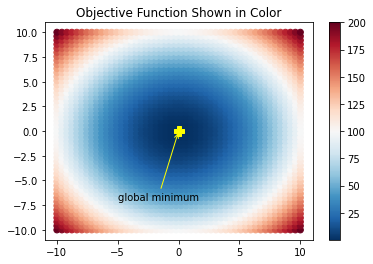

In [161]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

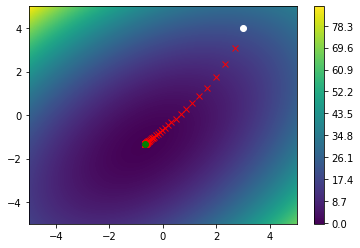

In [224]:
obj_func = lambda v: (v[0] ** 2) + (v[1] ** 2) - (v[0] * v[1]) + (2 * v[1]) + 1

grad_func = lambda th: (2 * th[0] - th[1], 2 * th[1] + 2 - th[0]) 

# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations, threshold, w_init, obj_func,grad_func, learning_rate=0.05):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*np.array(grad_func(w))
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history


def visualize(w_history):  
  res = 100

  _X = np.linspace(-5, 5, res)
  _Y = np.linspace(-5, 5, res)
  _Z = np.zeros((res, res))

  for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
      _Z[iy, ix] = func([x, y])

  plt.contourf(_X, _Y, _Z, 1000)
  plt.colorbar()
  plt.plot(w_history[0,0],w_history[0,1],marker='o',c='white') 
  for _ in np.arange(1,len(w_history)):
    if(_%15 == 0):
      plt.plot(w_history[_,0],w_history[_,1],marker='x',c='red') 
  plt.plot(w_history[-1,0],w_history[-1,1],marker='o',c='green') 
  #plt.plot(w_history[:,0],w_history[:,1],marker='o',c='red') 
  plt.show()

w_history, f_history = gradient_descent(1e5, 1e-12, (3,4), obj_func, grad_func, 0.01)
visualize(w_history)